In [3]:

import warnings

import matplotlib.pyplot as plt
# import MultiTrade
import numpy as np
import pandas as pd
from IPython.display import display
from neuralforecast.core import NeuralForecast
from neuralforecast.losses.numpy import mae, mse
from neuralforecast.models import NBEATS, BiTCN, TFT
from neuralforecast.auto import AutoBiTCN, AutoNBEATS, AutoTFT
from neuralforecast.losses.pytorch import MAE, RMSE
from statsforecast import StatsForecast

from utils.utils import build_market_image

warnings.filterwarnings("ignore")

In [4]:
COIN_PAIRS=['BTC/USDT','ETH/USDT','SOL/USDT','BNB/USDT','XRP/USDT','ADA/USDT',
            'ETH/BTC','SOL/ETH','BNB/ETH','XRP/ETH',"ADA/ETH",
            'SOL/BTC','SOL/BNB',
            'XRP/BTC','XRP/BNB',
            'ADA/BTC','ADA/BNB',
            ]
target_pair='ETHUSDT'
time_frame="1h"

In [5]:
time_frame='1h'
horizon = 7
context_length=5*horizon
start_dt=pd.Timestamp('2024-01-01')
split_dt=pd.Timestamp('2024-10-15')
end_dt=pd.Timestamp('2024-10-20')
split_buffer=pd.Timedelta(unit=time_frame[-1],value=context_length)

In [6]:

data=build_market_image(target_pair='ETH/USDT',time_frame=time_frame,axis=0)


train_data=data.groupby('symbol').apply(lambda x: x[start_dt:split_dt])
test_data=data.groupby('symbol').apply(lambda x: x[split_dt-split_buffer:end_dt])

train_data=train_data.reset_index(level=0,drop=True).reset_index()
test_data=test_data.reset_index(level=0,drop=True).reset_index()
# data=data[data['symbol']==target_pair].copy()
data['symbol'].unique()
id_col='symbol'


# test_data

['data/binanceus-ADAUSDT-1h.pkl', 'data/binanceus-ETHUSDT-1h.pkl', 'data/binanceus-XRPUSDT-1h.pkl', 'data/binanceus-BNBUSDT-1h.pkl', 'data/binanceus-SOLUSDT-1h.pkl', 'data/binanceus-BTCUSDT-1h.pkl']


0it [00:00, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

In [7]:
# train_data

In [8]:
front=['y','ds','symbol']
exo_gen_cols=data.filter(like='feature_').columns.tolist()
cols=front+[c for c in exo_gen_cols if c not in front]

train_data=train_data[cols]
test_data=test_data[cols]
# train_data
# data[id_col].unique()
# 

In [9]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [23]:
forecast_horizon=6
backend='optuna'
BiTCN_config=AutoBiTCN.get_default_config(h=forecast_horizon,backend=backend)

TFT_config=AutoTFT.get_default_config(h=forecast_horizon,backend=backend)
NBEATS_config=AutoNBEATS.get_default_config(h=forecast_horizon,backend=backend)

In [24]:
BiTCN_MODEL= AutoBiTCN(h=forecast_horizon,
                  loss=RMSE(),
                  config=BiTCN_config,
                  search_alg=optuna.samplers.TPESampler(),
                  backend='optuna',
                  num_samples=10)

TFT_MODEL= AutoTFT(h=forecast_horizon,
                  loss=RMSE(),
                  config=TFT_config,
                  search_alg=optuna.samplers.TPESampler(),
                  backend='optuna',
                  num_samples=10)

NBEATS_MODEL= AutoNBEATS(h=forecast_horizon,
                  loss=RMSE(),
                  config=NBEATS_config,
                  search_alg=optuna.samplers.TPESampler(),
                  backend='optuna',
                  num_samples=10)

models=[BiTCN_MODEL,TFT_MODEL,NBEATS_MODEL]

In [25]:

model = NeuralForecast(models=models,
                    local_scaler_type='robust',
                    
                     freq='1h')

In [26]:
model.fit(train_data,
        val_size=horizon,
        time_col='ds',                    
        target_col='y',
        id_col=id_col,
        
        )


Seed set to 17
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 5.4 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 496   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
6.0 K     Trainable params
0         Non-trainable params
6.0 K     Total params
0.024     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 4
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 5.4 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 496   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
6.0 K     Trainable params
0         Non-trainable params
6.0 K     Total params
0.024     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 15
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 64    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 21.0 K
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 608   
8 | temporal_lin2 | Linear        | 198   
9 | output_lin    | Linear        | 33    
------------------------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params
0.087     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 13
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 5.4 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 400   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
5.9 K     Trainable params
0         Non-trainable params
5.9 K     Total params
0.024     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 17
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 64    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 16.8 K
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 416   
8 | temporal_lin2 | Linear        | 198   
9 | output_lin    | Linear        | 33    
------------------------------------------------
17.5 K    Trainable params
0         Non-trainable params
17.5 K    Total params
0.070     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 8
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 4.3 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 208   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
4.6 K     Trainable params
0         Non-trainable params
4.6 K     Total params
0.019     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 9
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 5.4 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 400   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
5.9 K     Trainable params
0         Non-trainable params
5.9 K     Total params
0.024     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 7
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 5.4 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 496   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
6.0 K     Trainable params
0         Non-trainable params
6.0 K     Total params
0.024     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 16
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 4.3 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 208   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
4.6 K     Trainable params
0         Non-trainable params
4.6 K     Total params
0.019     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 3
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 32    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 3.2 K 
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 112   
8 | temporal_lin2 | Linear        | 102   
9 | output_lin    | Linear        | 17    
------------------------------------------------
3.5 K     Trainable params
0         Non-trainable params
3.5 K     Total params
0.014     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 15
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | RMSE          | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | lin_hist      | Linear        | 64    
4 | drop_hist     | Dropout       | 0     
5 | net_bwd       | Sequential    | 21.0 K
6 | drop_temporal | Dropout       | 0     
7 | temporal_lin1 | Linear        | 608   
8 | temporal_lin2 | Linear        | 198   
9 | output_lin    | Linear        | 33    
------------------------------------------------
21.9 K    Trainable params
0         Non-trainable params
21.9 K    Total params
0.087     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 15
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 512   
4 | static_encoder          | StaticCovariateEncoder   | 331 K 
5 | temporal_encoder        | TemporalCovariateEncoder | 613 K 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 252 K 
7 | output_adapter          | Linear                   | 129   
---------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 5
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 256   
4 | static_encoder          | StaticCovariateEncoder   | 83.8 K
5 | temporal_encoder        | TemporalCovariateEncoder | 154 K 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 63.7 K
7 | output_adapter          | Linear                   | 65    
---------------------------------------------------------------------
302 K     Trainable params
0         Non-trainable params
302 K     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 5
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 9
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     To

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 256   
4 | static_encoder          | StaticCovariateEncoder   | 83.8 K
5 | temporal_encoder        | TemporalCovariateEncoder | 154 K 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 64.8 K
7 | output_adapter          | Linear                   | 65    
---------------------------------------------------------------------
303 K     Trainable params
0         Non-trainable params
303 K     To

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 2
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 16
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 512   
4 | static_encoder          | StaticCovariateEncoder   | 331 K 
5 | temporal_encoder        | TemporalCovariateEncoder | 613 K 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 252 K 
7 | output_adapter          | Linear                   | 129   
---------------------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=2000` reached.
Seed set to 8
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 8
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                    | Type                     | Params
---------------------------------------------------------------------
0 | loss                    | RMSE                     | 0     
1 | padder_train            | ConstantPad1d            | 0     
2 | scaler                  | TemporalNorm             | 0     
3 | embedding               | TFTEmbedding             | 1.0 K 
4 | static_encoder          | StaticCovariateEncoder   | 1.3 M 
5 | temporal_encoder        | TemporalCovariateEncoder | 2.4 M 
6 | temporal_fusion_decoder | TemporalFusionDecoder    | 1.0 M 
7 | output_adapter          | Linear                   | 257   
---------------------------------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 19
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
312       Non-trainable params
2.4 M     Total params
9.676     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 19
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
468       Non-trainable params
2.4 M     Total params
9.775     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 18
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
156       Non-trainable params
2.4 M     Total params
9.577     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 5
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
312       Non-trainable params
2.4 M     Total params
9.676     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 18
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
312       Non-trainable params
2.4 M     Total params
9.676     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 16
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
468       Non-trainable params
2.4 M     Total params
9.775     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 13
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
390       Non-trainable params
2.4 M     Total params
9.726     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 8
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
156       Non-trainable params
2.4 M     Total params
9.577     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 13
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
390       Non-trainable params
2.4 M     Total params
9.726     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.
Seed set to 1
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
234       Non-trainable params
2.4 M     Total params
9.627     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Seed set to 16
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | RMSE          | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 2.4 M 
-----------------------------------------------
2.4 M     Trainable params
468       Non-trainable params
2.4 M     Total params
9.775     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=500` reached.


In [27]:
model.save('MultiHeadForecastingModel/',overwrite=True)

In [10]:
test_dates=test_data.sort_values('ds')['ds'].unique()
last_date=train_data['ds'].unique()[-1]

In [11]:
test_data

,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
0,0.3524,2024-10-13 13:00:00,ADAUSDT,0.065217,0.500000,-0.100000,0.283562,0.357418,0.353895,0.350372,0.000508,0.000887,44.864573,18.421053
1,0.3522,2024-10-13 14:00:00,ADAUSDT,0.108696,0.500000,-0.100000,0.283562,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474
2,0.3483,2024-10-13 15:00:00,ADAUSDT,0.152174,0.500000,-0.100000,0.283562,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189
3,0.3450,2024-10-13 16:00:00,ADAUSDT,0.195652,0.500000,-0.100000,0.283562,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897
4,0.3464,2024-10-13 17:00:00,ADAUSDT,0.239130,0.500000,-0.100000,0.283562,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.5411,2024-10-19 20:00:00,XRPUSDT,0.369565,0.333333,0.100000,0.300000,0.549908,0.545135,0.540362,-0.001382,-0.000889,34.677298,12.820513
932,0.5427,2024-10-19 21:00:00,XRPUSDT,0.413043,0.333333,0.100000,0.300000,0.549870,0.544985,0.540100,-0.001334,-0.000978,42.263183,33.333333
933,0.5421,2024-10-19 22:00:00,XRPUSDT,0.456522,0.333333,0.100000,0.300000,0.549719,0.544750,0.539781,-0.001329,-0.001048,40.369899,25.641026
934,0.5427,2024-10-19 23:00:00,XRPUSDT,0.500000,0.333333,0.100000,0.300000,0.549131,0.544450,0.539769,-0.001263,-0.001091,43.114263,33.333333


In [12]:
fcst_df = model.predict()
plot_df=train_data.groupby('symbol').tail(context_length)
plot_df
# fcst_df.tail()

NameError: name 'model' is not defined

In [13]:
StatsForecast.plot(plot_df, fcst_df, engine='matplotlib',id_col=id_col, max_insample_length=context_length,)


NameError: name 'plot_df' is not defined

In [14]:
pred_frame=data.groupby('symbol').apply(lambda x: x[last_date-split_buffer:split_dt])
pred_frame=pred_frame.reset_index(level=0,drop=True).reset_index()
pred_frame=pred_frame.drop('date_close',axis=1)

In [15]:
model=NeuralForecast.load('MultiHeadForecastingModel/')

Seed set to 1
Seed set to 15
Seed set to 16


In [16]:
fcst_df = model.predict(pred_frame)

# fcst_df.head()

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

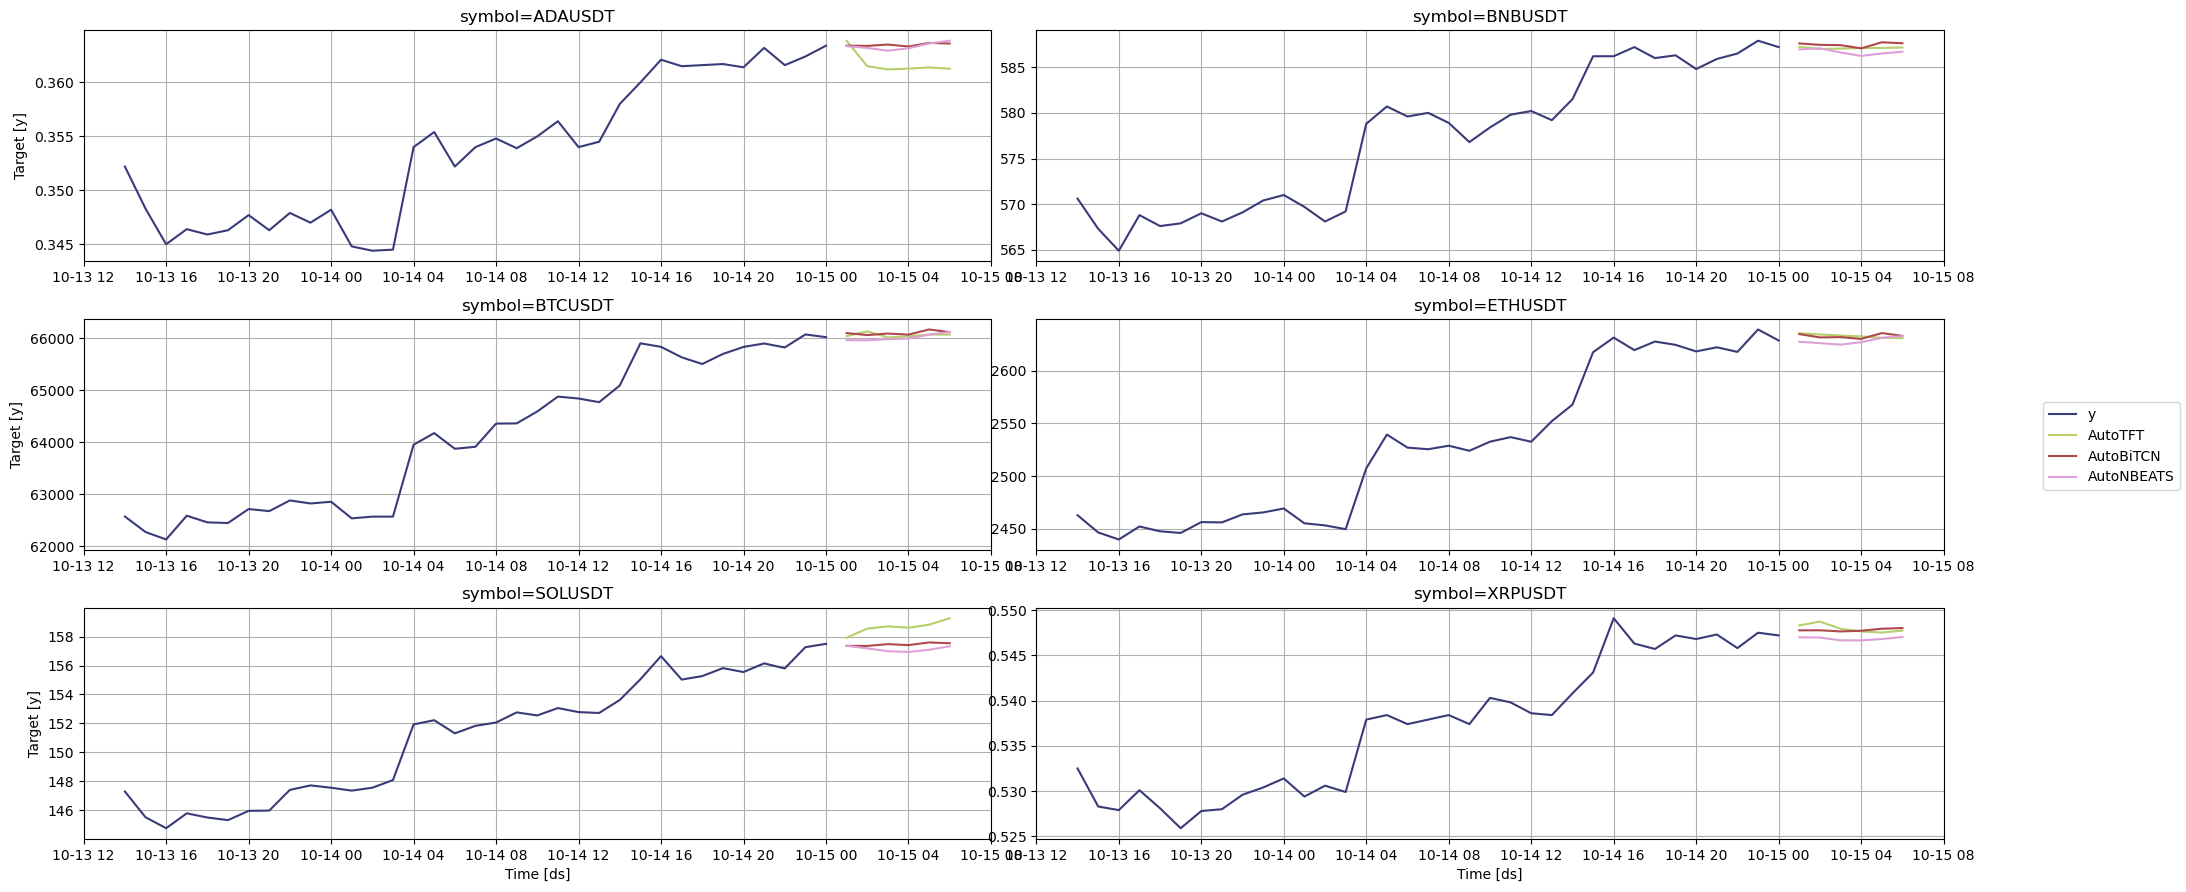

In [17]:
StatsForecast.plot(pred_frame, fcst_df, engine='matplotlib',id_col=id_col, max_insample_length=context_length,)


In [18]:
test_data

,y,ds,symbol,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K
0,0.3524,2024-10-13 13:00:00,ADAUSDT,0.065217,0.500000,-0.100000,0.283562,0.357418,0.353895,0.350372,0.000508,0.000887,44.864573,18.421053
1,0.3522,2024-10-13 14:00:00,ADAUSDT,0.108696,0.500000,-0.100000,0.283562,0.357423,0.353820,0.350217,0.000314,0.000772,44.103142,15.789474
2,0.3483,2024-10-13 15:00:00,ADAUSDT,0.152174,0.500000,-0.100000,0.283562,0.357949,0.353590,0.349231,-0.000153,0.000587,32.514671,2.830189
3,0.3450,2024-10-13 16:00:00,ADAUSDT,0.195652,0.500000,-0.100000,0.283562,0.359019,0.353215,0.347411,-0.000780,0.000314,26.233427,6.206897
4,0.3464,2024-10-13 17:00:00,ADAUSDT,0.239130,0.500000,-0.100000,0.283562,0.359465,0.352910,0.346355,-0.001151,0.000021,32.216054,17.006803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.5411,2024-10-19 20:00:00,XRPUSDT,0.369565,0.333333,0.100000,0.300000,0.549908,0.545135,0.540362,-0.001382,-0.000889,34.677298,12.820513
932,0.5427,2024-10-19 21:00:00,XRPUSDT,0.413043,0.333333,0.100000,0.300000,0.549870,0.544985,0.540100,-0.001334,-0.000978,42.263183,33.333333
933,0.5421,2024-10-19 22:00:00,XRPUSDT,0.456522,0.333333,0.100000,0.300000,0.549719,0.544750,0.539781,-0.001329,-0.001048,40.369899,25.641026
934,0.5427,2024-10-19 23:00:00,XRPUSDT,0.500000,0.333333,0.100000,0.300000,0.549131,0.544450,0.539769,-0.001263,-0.001091,43.114263,33.333333


In [19]:
# test_data=test_data.drop('close_date',axis=1)
test_data[exo_gen_cols].values.dtype

dtype('float64')

In [20]:
model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=False,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )


In [21]:
test_pred_insample = model.predict_insample(step_size=horizon)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

In [22]:
test_pred_insample['mean']=test_pred_insample.filter(like='Auto').mean(axis=1)
# test_pred_insample['mean']
# test_pred_insample['mean']
# test_pred_insample.filter(like='Auto').mean(axis=1)
# test_pred_insample.filter(like='Auto').mean(axis=1)

In [23]:
# test_pred_insample.columns=test_pred_insample.columns.str.replace('Auto','')

In [24]:
test_data['close']=test_data['y'].copy()


In [25]:
idx,cut_data=next(iter(test_pred_insample.groupby(['cutoff','symbol'])))
def flatten_preds(idx,cut_data):
    t_off_pred,symb=idx
    pred_cols=cut_data.filter(like='Auto').columns
    cut_data['mean_pred']=cut_data[pred_cols].mean(axis=1)
    cut_data=cut_data.drop(pred_cols,axis=1)
    t_cut=cut_data.T

    t_cut=t_cut.drop('cutoff')
    t_cut=t_cut.drop('ds')
    t_cut=t_cut.drop('y')
    # print(t_cut)
    h_cols=[f'H{i}' for i in range(horizon-1)]
    # print (h_cols)
    t_cut.columns=h_cols


    flat_cols=[f'feature_{model}_{horizon}' for model in t_cut.index for horizon in t_cut.columns]
    pred_values=t_cut.values.flatten()

    flat_df=pd.DataFrame([pred_values],columns=flat_cols)
    id_cols=['ds','symbol']

    flat_df[id_cols]=t_off_pred,symb
    flat_df=  flat_df[id_cols+flat_cols]
    return flat_df

def simulate_forecasts(model,df):
    model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=False,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )
    
    
    return model.predict_insample(step_size=1)

def prepare_forecast_data(model,test_data):
    
    pred_df= simulate_forecasts(model,test_data)
    flattened_preds=pd.concat([flatten_preds(idx,cut_data) for idx,cut_data in pred_df.groupby(['cutoff','symbol'])])
    return flattened_preds



prepare_forecast_data(model,test_data)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,symbol,feature_mean_pred_H0,feature_mean_pred_H1,feature_mean_pred_H2,feature_mean_pred_H3,feature_mean_pred_H4,feature_mean_pred_H5
0,2024-10-13 12:00:00,ADAUSDT,0.348569,0.348503,0.349263,0.349391,0.349313,0.348757
0,2024-10-13 12:00:00,BNBUSDT,588.432800,588.355286,589.247070,589.397156,589.305237,588.653076
0,2024-10-13 12:00:00,BTCUSDT,66347.367188,66331.320312,66515.882812,66546.937500,66527.929688,66392.960938
0,2024-10-13 12:00:00,ETHUSDT,2598.935303,2598.607178,2602.379150,2603.013672,2602.625244,2599.866943
0,2024-10-13 12:00:00,SOLUSDT,153.117523,153.097351,153.329239,153.368240,153.344360,153.174805
...,...,...,...,...,...,...,...,...
0,2024-10-19 18:00:00,BNBUSDT,594.250244,594.033752,594.328613,594.251099,594.221558,594.290771
0,2024-10-19 18:00:00,BTCUSDT,68063.851562,68064.992188,68094.171875,68097.273438,68084.843750,68083.406250
0,2024-10-19 18:00:00,ETHUSDT,2640.953857,2639.764648,2641.707520,2643.805664,2644.312500,2643.058350
0,2024-10-19 18:00:00,SOLUSDT,155.654892,155.560074,155.599350,155.698990,155.748672,155.672195


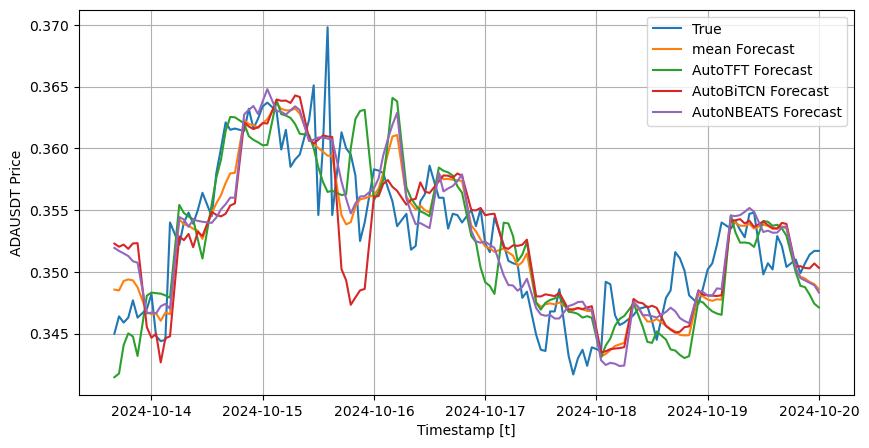

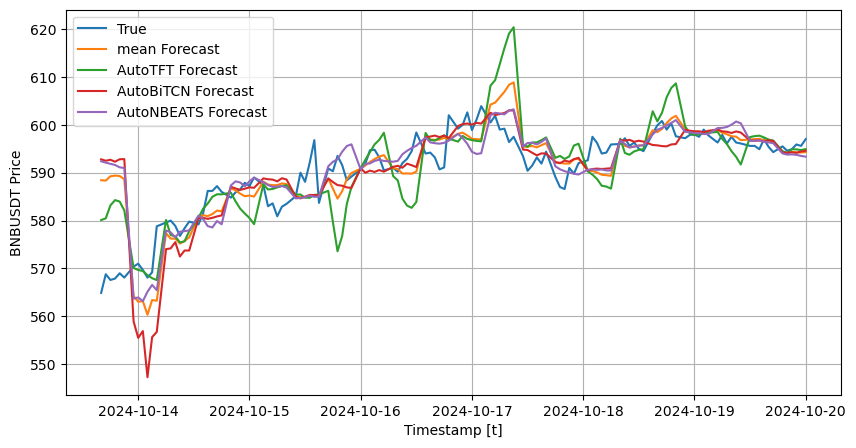

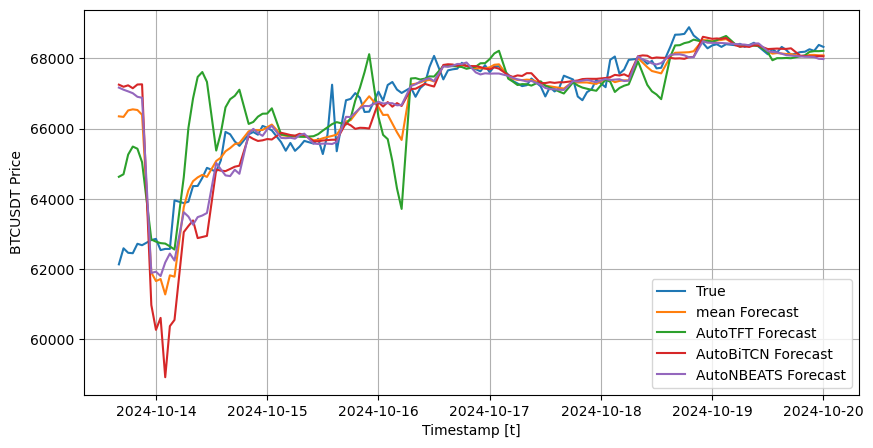

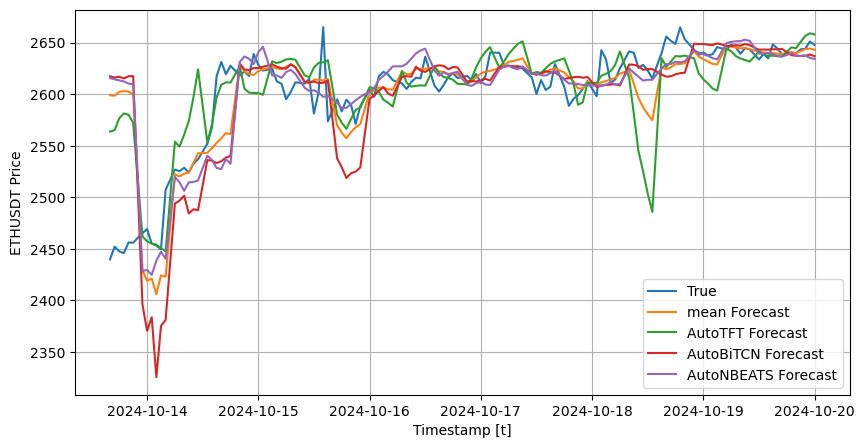

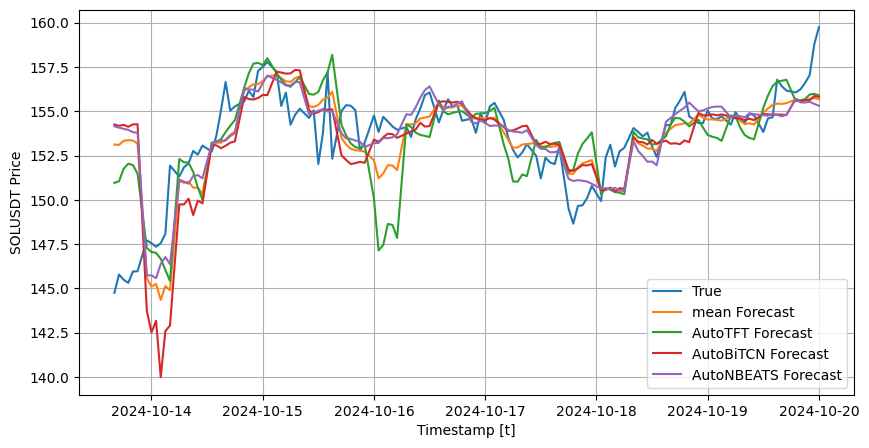

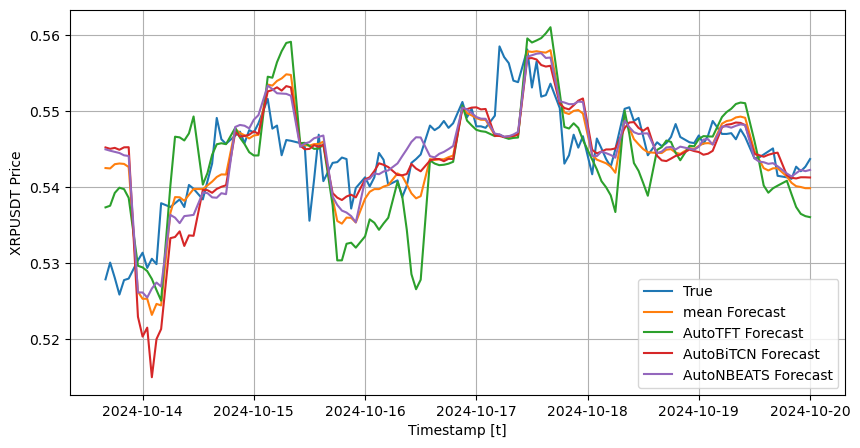

In [26]:
cut_data
for symb,cut in test_pred_insample.groupby('symbol'):
    cut['mean']=cut.filter(like='Auto').mean(axis=1)

    plt.figure(figsize=(10, 5))
    
    plt.plot(cut['ds'], cut['y'], label='True')
    plt.plot(cut['ds'], cut['mean'] ,label='mean Forecast')
    for model in cut.filter(like='Auto').columns:
        plt.plot(cut['ds'], cut[model], label=f'{model} Forecast')
    # plt.plot(cut['ds'], cut['NBEATS'], label='NBEATS Forecast')
    # plt.plot(cut['ds'], cut['BiTCN'], label='BiTCN Forecast')
    # plt.plot(cut['ds'], cut['TFT'], label='TFT Forecast')
    # plt.axvline(cut['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
    plt.xlabel('Timestamp [t]')
    plt.ylabel(f'{symb} Price')
    plt.grid()
    plt.legend()

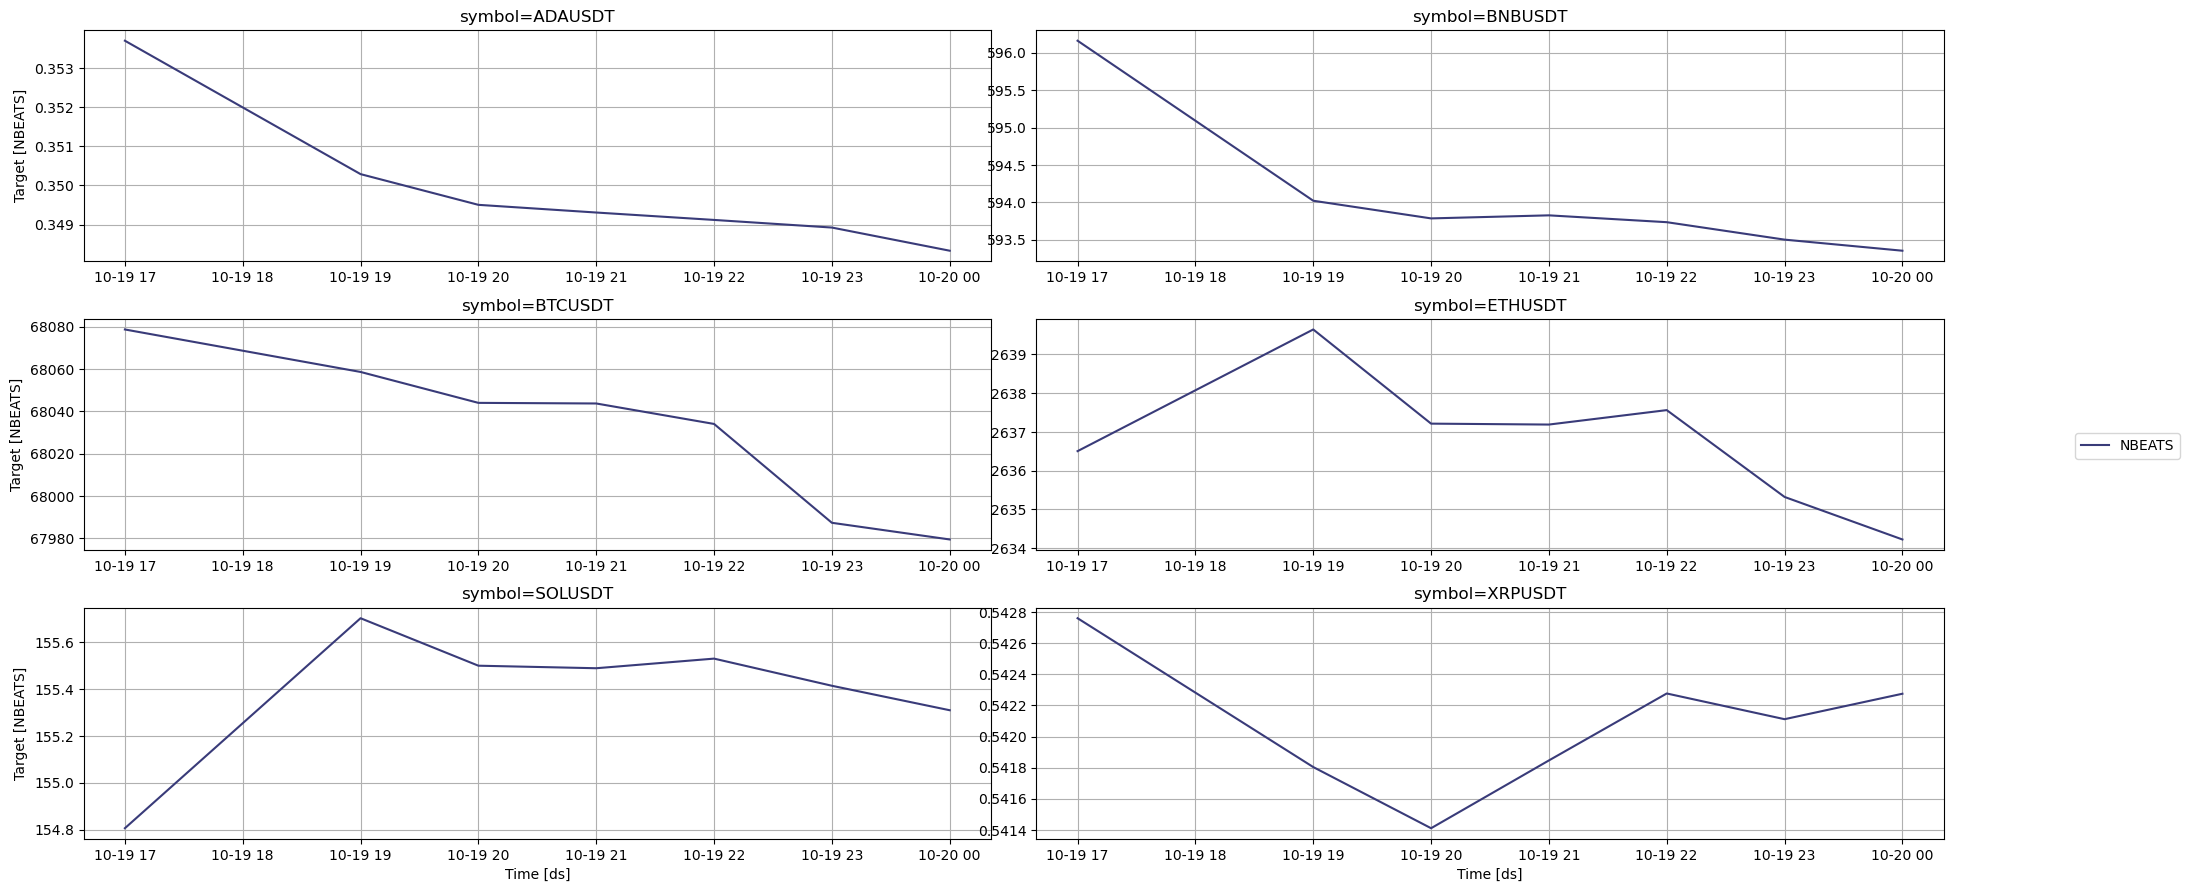

In [54]:
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col, max_insample_length=horizon,)
StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col,target_col='NBEATS', max_insample_length=horizon,)
